<a href="https://colab.research.google.com/github/ubirajarasegura/CA683-2022-Credit-Risk-Analysis/blob/main/analytics_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Importing datasets

In [ ]:
#link to the databases: https://www.kaggle.com/datasets/mishra5001/credit-card

#Importing loan application data
df1 = pd.read_csv('application_data.csv', sep=',')

#Importing feature description dictionary
desc = pd.read_csv('columns_description.csv', sep=',', encoding='latin-1')

## Exploration data analisys

In [ ]:
#Checking database size
df1.shape

(307511, 122)

In [ ]:
#There are a lot of NAN instances on this Dataset,
#There are almost 20 features with 70% of missing data
#its impossible to just drop and loose this amount of information  
#Then we have to treat these missing values
pd.DataFrame(df1.isna().mean().sort_values(ascending=False), columns=['Percentage of missing data on the feature'])

,Percentage of missing data on the feature
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
NONLIVINGAPARTMENTS_MEDI,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_MODE,0.683550
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MEDI,0.683550


Text(0, 0.5, 'Quantity of columns')

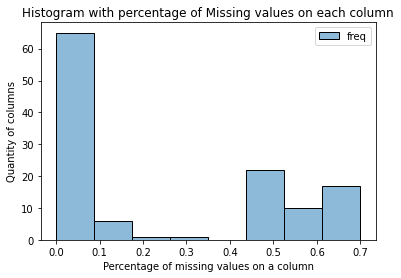

In [ ]:
#Histogram with the information above
plt.figure()
x=pd.DataFrame(df1.isna().mean())
x.columns=['freq']
x = x.round(decimals=1)
sns.histplot(x)
plt.title('Histogram with percentage of Missing values on each column')
plt.xlabel('Percentage of missing values on a column')
plt.ylabel('Quantity of columns')

In [ ]:
#Description of each column
pd.set_option('display.max_colwidth', -1)
desc[['Row','Description']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


#Feature engineering on categorical document features

In [ ]:
#Creating a new feature from 21 features that inform if the applicant submitted each document

#First we create a subset with these 21 features
df_docs = df1[['FLAG_DOCUMENT_16','FLAG_DOCUMENT_13','FLAG_DOCUMENT_6','FLAG_DOCUMENT_14'
                ,'FLAG_DOCUMENT_8','FLAG_DOCUMENT_18','FLAG_DOCUMENT_15','FLAG_DOCUMENT_9','FLAG_DOCUMENT_11'
                ,'FLAG_DOCUMENT_17','FLAG_DOCUMENT_14','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_19','FLAG_DOCUMENT_4'
                ,'FLAG_DOCUMENT_12','FLAG_DOCUMENT_5','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3'        
                ]]

#Dropping them on the principal dataset
df1.drop(columns=['FLAG_DOCUMENT_16','FLAG_DOCUMENT_13','FLAG_DOCUMENT_6','FLAG_DOCUMENT_14','FLAG_DOCUMENT_4'
                ,'FLAG_DOCUMENT_8','FLAG_DOCUMENT_18','FLAG_DOCUMENT_15','FLAG_DOCUMENT_9','FLAG_DOCUMENT_11'
                ,'FLAG_DOCUMENT_17','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_19','FLAG_DOCUMENT_3'    
                ,'FLAG_DOCUMENT_12','FLAG_DOCUMENT_5','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_2'   
                ],inplace=True)

In [ ]:
#print("Total size of the dataset: ",df_docs.shape[0])
#df_docs.dropna(inplace=True)
#print("Total size after dropping na value: ",df_docs.shape[0])

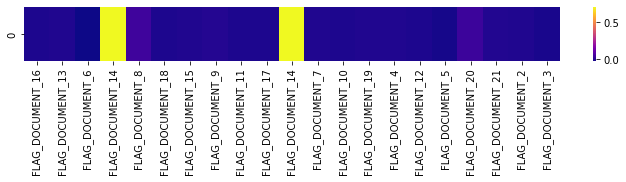

In [ ]:
#Appling standard scaler over each column of the dataset

#The standardScaler calculates the mean and Standard deviation of each columns 
#and calculate the difference of each value from the mean and divide by the SD
#It helps the PCA algorithm to avoid penalize features with small amplitudes
scaled_data = StandardScaler().fit(df_docs).transform(df_docs)

#Applying the scaled data on a PCA algorithm with the hiperparameter defined to
#generate an outcome with just one feature
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

#Heatmap the correlation of each feature to the label column
plt.figure(figsize=(12,1)).tight_layout()
sns.heatmap(pd.DataFrame(pca.components_,columns=df_docs.columns)
            ,cmap='plasma',)

#Creating a new column on the principal dataset with this PCA feature
df1['DOCS'] = x_pca

#Feature engineering on Region data 

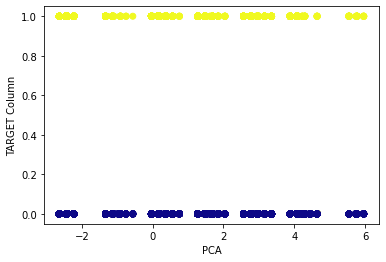

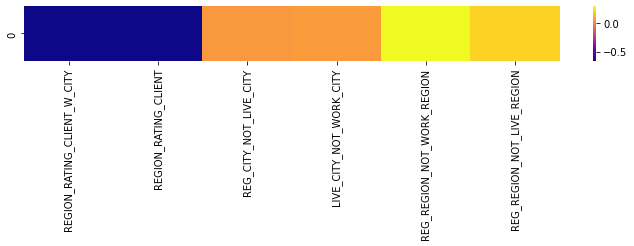

In [ ]:
#Appling the same methodology on features related to region data of the applicant
df_reg = df1[['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'
              ,'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY'
              ,'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION'
            ]]

df1.drop(columns=['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'
                  ,'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY'
                  ,'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION'    
                 ]
         ,inplace=True)

scaled_data = StandardScaler().fit(df_reg).transform(df_reg)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_reg.columns)
            ,cmap='plasma',)

df1['REG'] = x_pca

#Feature engineering on phone information data

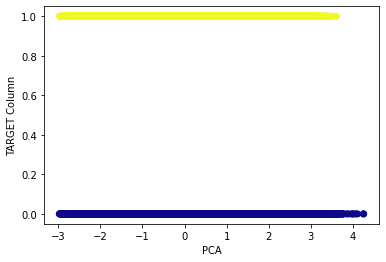

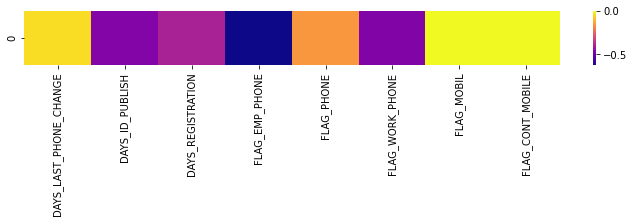

In [ ]:
#Appling the same methodology on features related to phone data of the applicant

df1.dropna(subset=['DAYS_LAST_PHONE_CHANGE'],inplace=True)

df_phone = df1[['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH'
              ,'DAYS_REGISTRATION','FLAG_EMP_PHONE','FLAG_PHONE'
              ,'FLAG_WORK_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE'
            ]]

df1.drop(columns=['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH'
              ,'DAYS_REGISTRATION','FLAG_EMP_PHONE','FLAG_PHONE'
              ,'FLAG_WORK_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE'
                ]
          ,inplace=True)

scaled_data = StandardScaler().fit(df_phone).transform(df_phone)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_phone.columns)
            ,cmap='plasma',)

df1['PHONE'] = x_pca

In [ ]:
#Appling the same methodology on features related to social circle default data
# of the applicant, however in this case we have some missing values on these 
#features, therefore we have to fix them before the PCA process.
df_soc_circle =df1[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
                  , 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'
                  ,'AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2','DAYS_EMPLOYED','CNT_FAM_MEMBERS']]     

#Appling filling temporarily missing values of each feature with its mean values
df_soc_circle.AMT_ANNUITY.fillna(27108.58, inplace=True)
df_soc_circle.EXT_SOURCE_2.fillna(0.5144, inplace=True)
df_soc_circle.CNT_FAM_MEMBERS.fillna(2.15, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#Feature engineering on social circle information

In [ ]:
#Applying Linear regression on missing values of the column 
#DEF_30_CNT_SOCIAL_CIRCLE. With the most correlated columns (described on X_train).
#There correlated columns have missing values too, however they are substituted 
#with its column mean.

#Sellecting the most correlated featured of DEF_30_CNT_SOCIAL_CIRCLE.
#these correlation test was done with pandas "corr" method.
X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]

#Selecting lavel column DEF_30_CNT_SOCIAL_CIRCLE                                  
y_train = df_soc_circle.dropna()['DEF_30_CNT_SOCIAL_CIRCLE']

#Selecting where the linear regressing will be applied (missing values of
#DEF_30_CNT_SOCIAL_CIRCLE column)
X_test = df_soc_circle[df_soc_circle.DEF_30_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]


#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression
#instaciating the model
lm = LinearRegression()

#fitting training data on the model
lm.fit(X_train,y_train)

#Appling the linear regression outcome where the column DEF_30_CNT_SOCIAL_CIRCLE
#has missing values
df1.loc[
          df1.DEF_30_CNT_SOCIAL_CIRCLE.isna()==True, ['DEF_30_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

In [ ]:
#Appling the same methodology on DEF_60_CNT_SOCIAL_CIRCLE

X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]
y_train = df_soc_circle.dropna()['DEF_60_CNT_SOCIAL_CIRCLE']
X_test = df_soc_circle[df_soc_circle.DEF_60_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]


from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.DEF_60_CNT_SOCIAL_CIRCLE.isna()==True, ['DEF_60_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

In [ ]:
#Appling the same methodology on OBS_30_CNT_SOCIAL_CIRCLE

X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]
y_train = df_soc_circle.dropna()['OBS_30_CNT_SOCIAL_CIRCLE']
X_test = df_soc_circle[df_soc_circle.OBS_30_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]

y_test = df_soc_circle[df_soc_circle.OBS_30_CNT_SOCIAL_CIRCLE.isna()==True]['OBS_30_CNT_SOCIAL_CIRCLE']

#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.OBS_30_CNT_SOCIAL_CIRCLE.isna()==True, ['OBS_30_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

In [ ]:
#Appling the same methodology on OBS_30_CNT_SOCIAL_CIRCLE

X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]
y_train = df_soc_circle.dropna()['OBS_60_CNT_SOCIAL_CIRCLE']
X_test = df_soc_circle[df_soc_circle.OBS_60_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]

y_test = df_soc_circle[df_soc_circle.OBS_60_CNT_SOCIAL_CIRCLE.isna()==True]['OBS_60_CNT_SOCIAL_CIRCLE']

#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.OBS_60_CNT_SOCIAL_CIRCLE.isna()==True, ['OBS_60_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

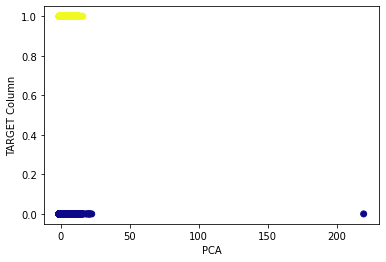

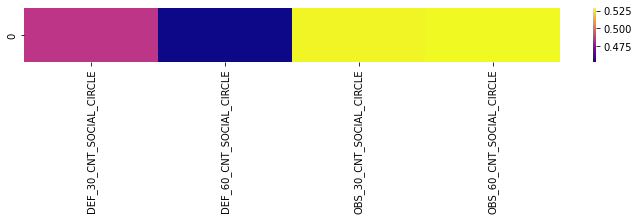

In [ ]:
#Since the social circle features do not have missing values, they are
#ready to be applied on the PCA model.
#The PCA model has already described before.

df_SC = df1[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
            , 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']]

df1.drop(columns=['DEF_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'
              ,'DEF_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']
          ,inplace=True)

scaled_data = StandardScaler().fit(df_SC).transform(df_SC)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_SC.columns)
            ,cmap='plasma',)

df1['SOCIAL_CIRCLE_DEF'] = x_pca

In [ ]:
#The feature 'AMT_REQ_CREDIT_BUREAU_YEAR' dont have any highly correlated feature
#and also there is not any logical relation between this feature and the others 
#from the Dataset
#This feature mean the quantity of time the applicant applied on for a loan on
#the last year.
#Since the quantity of missing values are too low and the standard deviation os low too
#Were appling the mean over the missing values.
df1[df1.AMT_REQ_CREDIT_BUREAU_YEAR.isna()==True]['AMT_REQ_CREDIT_BUREAU_YEAR'] =  1.9

#Drop other features higly correlated to AMT_REQ_CREDIT_BUREAU_YEAR to avoid 
#increase degrees of freedom on the dataset.
#these features are realated to other periods of loan application. 
df1.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Feature engineering on housing information data

In [ ]:
#Appling PCA on housing information

#Creating a subset
df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]]     

#dropping this subset on the principal dataset
df1.drop(columns=['LANDAREA_AVG','LANDAREA_MEDI','NONLIVINGAREA_MEDI'
                  ,'NONLIVINGAREA_AVG','COMMONAREA_AVG','COMMONAREA_MEDI'
                  ,'ENTRANCES_MEDI','ENTRANCES_AVG','BASEMENTAREA_MEDI'
                  ,'BASEMENTAREA_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG'
               ],inplace=True)                

#Appling mean on the missing data of these features temporarily
df_build.NONLIVINGAREA_MODE.fillna(0.0270, inplace=True)
df_build.COMMONAREA_MODE.fillna(0.0426, inplace=True)
df_build.ENTRANCES_MODE.fillna(0.1452, inplace=True)
df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Appling linear regression on LANDAREA_MODE

X_train = df_build.dropna().drop(columns='LANDAREA_MODE')
y_train = df_build.dropna()['LANDAREA_MODE']
X_test = df_build[df_build.LANDAREA_MODE.isna()==True].drop(columns='LANDAREA_MODE')

lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.LANDAREA_MODE.isna()==True, ['LANDAREA_MODE']
         ]  = lm.predict(X_test)

In [ ]:
#Appling linear regression on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='NONLIVINGAREA_MODE')
y_train = df_build.dropna()['NONLIVINGAREA_MODE']

#Since LANDAREA_MODE do not have missing data anymore. We can apply it directly 
#on the linear regression model, the mean in not necessary.
df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 
df_build.COMMONAREA_MODE.fillna(0.0426, inplace=True)
df_build.ENTRANCES_MODE.fillna(0.1452, inplace=True)
df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.NONLIVINGAREA_MODE.isna()==True].drop(columns='NONLIVINGAREA_MODE')

lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.NONLIVINGAREA_MODE.isna()==True, ['NONLIVINGAREA_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Appling linear regression on COMMONAREA_MODE

X_train = df_build.dropna().drop(columns='COMMONAREA_MODE')
y_train = df_build.dropna()['COMMONAREA_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 
               
df_build.ENTRANCES_MODE.fillna(0.1452, inplace=True)
df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.COMMONAREA_MODE.isna()==True].drop(columns='COMMONAREA_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.COMMONAREA_MODE.isna()==True, ['COMMONAREA_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Appling linear regression on ENTRANCES_MODE

X_train = df_build.dropna().drop(columns='ENTRANCES_MODE')
y_train = df_build.dropna()['ENTRANCES_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 

df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.ENTRANCES_MODE.isna()==True].drop(columns='ENTRANCES_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.ENTRANCES_MODE.isna()==True, ['ENTRANCES_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Appling linear regression on BASEMENTAREA_MODE

X_train = df_build.dropna().drop(columns='BASEMENTAREA_MODE')
y_train = df_build.dropna()['BASEMENTAREA_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 
               
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.BASEMENTAREA_MODE.isna()==True].drop(columns='BASEMENTAREA_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.BASEMENTAREA_MODE.isna()==True, ['BASEMENTAREA_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Appling linear regression on YEARS_BUILD_MODE

X_train = df_build.dropna().drop(columns='YEARS_BUILD_MODE')
y_train = df_build.dropna()['YEARS_BUILD_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 
               
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.YEARS_BUILD_MODE.isna()==True].drop(columns='YEARS_BUILD_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.YEARS_BUILD_MODE.isna()==True, ['YEARS_BUILD_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Appling linear regression on LIVINGAPARTMENTS_MODE

X_train = df_build.dropna().drop(columns='LIVINGAPARTMENTS_MODE')
y_train = df_build.dropna()['LIVINGAPARTMENTS_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 

df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.LIVINGAPARTMENTS_MODE.isna()==True].drop(columns='LIVINGAPARTMENTS_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.LIVINGAPARTMENTS_MODE.isna()==True, ['LIVINGAPARTMENTS_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Appling linear regression on FLOORSMAX_MODE

X_train = df_build.dropna().drop(columns='FLOORSMAX_MODE')
y_train = df_build.dropna()['FLOORSMAX_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 

X_test = df_build[df_build.FLOORSMAX_MODE.isna()==True].drop(columns='FLOORSMAX_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.FLOORSMAX_MODE.isna()==True, ['FLOORSMAX_MODE']
         ]  = lm.predict(X_test)

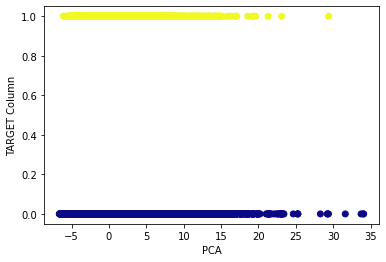

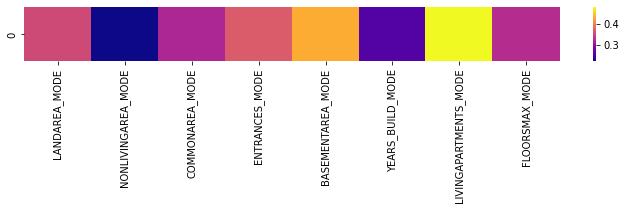

In [ ]:
#PCA on housing data

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]]    

df1.drop(columns=['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE'
                  ,'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ],inplace=True)  

scaled_data = StandardScaler().fit(df_build).transform(df_build)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_build.columns)
            ,cmap='plasma',)

df1['HOME'] = x_pca

#Feature engineering on car age 

In [ ]:
#finding highly linear correlated features with not car owners
df1[df1.OWN_CAR_AGE.isna()==True].corr()['TARGET'].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.092280
REG_CITY_NOT_WORK_CITY          0.062210
DEF_60_CNT_SOCIAL_CIRCLE        0.031591
CNT_CHILDREN                    0.029301
SOCIAL_CIRCLE_DEF               0.023564
CNT_FAM_MEMBERS                 0.019620
AMT_REQ_CREDIT_BUREAU_YEAR      0.014227
LIVE_REGION_NOT_WORK_REGION     0.009743
OBS_30_CNT_SOCIAL_CIRCLE        0.007262
OBS_60_CNT_SOCIAL_CIRCLE        0.007133
AMT_INCOME_TOTAL                0.002841
NONLIVINGAPARTMENTS_MODE       -0.000369
FLAG_EMAIL                     -0.000598
NONLIVINGAPARTMENTS_MEDI       -0.001417
NONLIVINGAPARTMENTS_AVG        -0.001802
SK_ID_CURR                     -0.002033
AMT_ANNUITY                    -0.006289
DOCS                           -0.008891
YEARS_BEGINEXPLUATATION_MODE   -0.010965
YEARS_BEGINEXPLUATATION_AVG    -0.011669
YEARS_BEGINEXPLUATATION_MEDI   -0.011818
YEARS_BUILD_AVG                -0.020217
HOME                           -0.020295
YEARS_BUILD_MEDI

In [ ]:
#Appling linear regression on OWN_CAR_AGE

X_train = df1.dropna()[['REG_CITY_NOT_WORK_CITY', 'PHONE', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']]
y_train = df1.dropna()['OWN_CAR_AGE']
X_test = df1[df1.OWN_CAR_AGE.isna()==True][['REG_CITY_NOT_WORK_CITY', 'PHONE', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']]
y_test = df1[df1.OWN_CAR_AGE.isna()==True]['OWN_CAR_AGE']

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.OWN_CAR_AGE.isna()==True, ['OWN_CAR_AGE']
         ]  = lm.predict(
                          df1[df1.OWN_CAR_AGE.isna()==True][['REG_CITY_NOT_WORK_CITY', 'PHONE'
                                                                , 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']]
                        )

#Feature engineering on categorical features

In [ ]:
#Creating subset
df1_cat = df1[['NAME_CONTRACT_TYPE',
                'CODE_GENDER',
                'FLAG_OWN_CAR',
                'FLAG_OWN_REALTY',
                'NAME_TYPE_SUITE',
                'NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS',
                'NAME_HOUSING_TYPE',
                'OCCUPATION_TYPE','SK_ID_CURR']]

In [ ]:
#Applying new category on missing data of NAME_TYPE_SUITE and OCCUPATION_TYPE features
df1_cat.loc[ df1_cat.NAME_TYPE_SUITE.isna()==True, ['NAME_TYPE_SUITE'] ]  = "not_defined"
df1_cat.loc[ df1_cat.OCCUPATION_TYPE.isna()==True, ['OCCUPATION_TYPE'] ]  = "not_defined"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#Applying getdummies pandas method on these categorical values in order to create a "one hot encoding" data
df1_cat = pd.get_dummies(df1_cat, columns=['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY',
                                        'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                                        'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])

In [ ]:
#Creating training data subset
test1 = df1[['SK_ID_CURR','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','PHONE','REG'
,'DAYS_EMPLOYED','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL'
,'AMT_CREDIT','HOME','AMT_ANNUITY','DOCS'
,'DAYS_BIRTH','REG_CITY_NOT_WORK_CITY','OWN_CAR_AGE','SOCIAL_CIRCLE_DEF','CNT_CHILDREN','TARGET']]

In [ ]:
#Merging the subset created above with the categorical data (one hot encoded)
test1 = test1.merge(df1_cat, on='SK_ID_CURR', how='left', indicator=True)
test1._merge.value_counts()

both          307510
left_only     0     
right_only    0     
Name: _merge, dtype: int64

#Feature engineering on external source scores features

In [ ]:
#Selecting a subset with these 3 external scores 
df_fe = test1[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]              

#Appying mean over the missing data temporarily
df_fe.loc[
          df_fe.EXT_SOURCE_2.isna()==True, ['EXT_SOURCE_2']
         ]  = df_fe.EXT_SOURCE_2.mean()

df_fe.loc[
          df_fe.EXT_SOURCE_1.isna()==True, ['EXT_SOURCE_1']
         ]  = df_fe.EXT_SOURCE_1.mean()         

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
#Linear regression on EXT_SOURCE_3

X_train = df_fe.dropna().drop(columns='EXT_SOURCE_3')
y_train = df_fe.dropna()['EXT_SOURCE_3']

X_test = df_fe[df_fe.EXT_SOURCE_3.isna()==True].drop(columns='EXT_SOURCE_3')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

test1.loc[
          test1.EXT_SOURCE_3.isna()==True, ['EXT_SOURCE_3']
         ]  = lm.predict(X_test)

In [ ]:
#Linear regression on EXT_SOURCE_1

X_train = df_fe.dropna().drop(columns='EXT_SOURCE_1')
y_train = df_fe.dropna()['EXT_SOURCE_1']

df_fe = test1[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]              

df_fe.loc[
          df_fe.EXT_SOURCE_2.isna()==True, ['EXT_SOURCE_2']
         ]  = df_fe.EXT_SOURCE_2.mean()

df_fe.loc[
          df_fe.EXT_SOURCE_3.isna()==True, ['EXT_SOURCE_3']
         ]  = df_fe.EXT_SOURCE_3.mean()     

X_test = df_fe[df_fe.EXT_SOURCE_1.isna()==True].drop(columns='EXT_SOURCE_1')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

test1.loc[
          test1.EXT_SOURCE_1.isna()==True, ['EXT_SOURCE_1']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
#Linear regression on EXT_SOURCE_2

X_train = df_fe.dropna().drop(columns='EXT_SOURCE_2')
y_train = df_fe.dropna()['EXT_SOURCE_2']

df_fe = test1[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]              

df_fe.loc[
          df_fe.EXT_SOURCE_1.isna()==True, ['EXT_SOURCE_1']
         ]  = df_fe.EXT_SOURCE_1.mean()

df_fe.loc[
          df_fe.EXT_SOURCE_3.isna()==True, ['EXT_SOURCE_3']
         ]  = df_fe.EXT_SOURCE_3.mean()     

X_test = df_fe[df_fe.EXT_SOURCE_2.isna()==True].drop(columns='EXT_SOURCE_2')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

test1.loc[
          test1.EXT_SOURCE_2.isna()==True, ['EXT_SOURCE_2']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
#Appling mean on AMT_GOODS_PRICE and AMT_ANNUITY missing values because
#the quantity is too low of missing values.
test1.loc[
          test1.AMT_GOODS_PRICE.isna()==True, ['AMT_GOODS_PRICE']
         ]  = test1.AMT_GOODS_PRICE.mean()

test1.loc[
          test1.AMT_ANNUITY.isna()==True, ['AMT_ANNUITY']
         ]  = test1.AMT_ANNUITY.mean()                                              

In [ ]:
test1.head()

,SK_ID_CURR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,PHONE,REG,DAYS_EMPLOYED,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_CREDIT,HOME,AMT_ANNUITY,DOCS,DAYS_BIRTH,REG_CITY_NOT_WORK_CITY,OWN_CAR_AGE,SOCIAL_CIRCLE_DEF,CNT_CHILDREN,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_not_defined,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_defined,_merge
0,100002,0.139376,0.262949,0.083037,-0.712676,-0.034571,-637,351000.0,0.018801,202500.0,406597.5,-2.867648,24700.5,-0.088779,-9461,0,11.448804,4.658918,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,both
1,100003,0.491280,0.622246,0.311267,-1.559705,2.567701,-1188,1129500.0,0.003541,270000.0,1293502.5,-1.040911,35698.5,-0.088779,-16765,0,11.466592,-0.464739,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both
2,100004,0.729567,0.555912,0.525416,-1.698538,-0.034571,-225,135000.0,0.010032,67500.0,135000.0,0.042555,6750.0,-0.071812,-19046,0,26.000000,-0.907919,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,both
3,100006,0.523274,0.650442,0.517690,0.388927,-0.034571,-3039,297000.0,0.008019,135000.0,312682.5,0.042555,29686.5,-0.088779,-19005,0,12.786396,-0.021559,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,both
4,100007,0.491385,0.322738,0.485589,0.106292,0.156870,-3038,513000.0,0.028663,121500.0,513000.0,0.042555,21865.5,0.108548,-19932,1,11.444036,-0.907919,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,both


In [ ]:
#Checking for missing values the whole training dataset
pd.Series(test1.isna().sum()>0).sum()

0

In [ ]:
#test1.dropna(inplace=True)

In [ ]:
#Cheking the pairplot over the traning dataset
#sns.pairplot(df1)

# FULL MODEL

In [ ]:
#Comapring the main dataset with the feature enginerred traning data
test1.shape[0], df1.shape[0]

(307510, 307510)

In [ ]:
#Drop "_merge" columns it indicates where the merge worked properlly
test1.drop(columns=['_merge'],inplace=True)

In [ ]:
#Applying decision tree classifier over the training data

#inporting models
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Defining traning dataset and label
X = test1.drop('TARGET',axis=1)
y = test1['TARGET']

#defnining test and traning data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#instanciating model and fitting traning data on it
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

#Outcome of the model
pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

#Classification report of the model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     84780
           1       0.14      0.16      0.15      7473

    accuracy                           0.85     92253
   macro avg       0.53      0.54      0.53     92253
weighted avg       0.86      0.85      0.86     92253



In [ ]:
#Confusion matrix on DTC
print(confusion_matrix(y_test,pred))

[[77301  7479]
 [ 6255  1218]]


In [ ]:
#Same process on RFC
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

pred2 = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84780
           1       0.85      0.00      0.00      7473

    accuracy                           0.92     92253
   macro avg       0.88      0.50      0.48     92253
weighted avg       0.91      0.92      0.88     92253



In [ ]:
print(confusion_matrix(y_test,pred2)) 

[[84778     2]
 [ 7462    11]]


In [ ]:
test1[test1.TARGET==0]['TARGET'].count()/test1.shape[0]

0.9192709180189262

In [ ]:
test1[test1.TARGET>0]['TARGET'].count()/test1.shape[0]

0.08072908198107379

# UNBIASING

In [ ]:
#The model is too unbalanced then were traning again the same number of
# instances default and not default

#Selecting randomly the nor default instances
test2 = test1[test1.TARGET==0].sample(24825 )
#Appending not default data with default
test2 = test2.append(test1[test1.TARGET>0])

#result is the same number for both classes
test2.TARGET.value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [ ]:
#Appling on DTC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = test2.drop('TARGET',axis=1)
y = test2['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred3 = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59      7465
           1       0.58      0.58      0.58      7430

    accuracy                           0.58     14895
   macro avg       0.58      0.58      0.58     14895
weighted avg       0.58      0.58      0.58     14895



In [ ]:
print(confusion_matrix(y_test,pred3))

[[4378 3087]
 [3123 4307]]


In [ ]:
#Appling on RFC
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

pred4 = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      7465
           1       0.68      0.67      0.68      7430

    accuracy                           0.68     14895
   macro avg       0.68      0.68      0.68     14895
weighted avg       0.68      0.68      0.68     14895



In [ ]:
print(confusion_matrix(y_test,pred4))

[[5125 2340]
 [2434 4996]]


#Deep Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
#Setting data traning without label column
X = test2.drop('TARGET',axis=1).values

#Setting label column
y = test2['TARGET'].values

#defning traning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
#Appling min max scaler (interpolates data from 0 to 1)
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape[0], y_train.shape[0], X_test.shape[0],y_test.shape[0]

(34755, 34755, 14895, 14895)

In [ ]:
#Creating the neural layers
model = Sequential()

#in the first layer the number of neurons is the same number of features 80
#The activation function is the rectified activation function
model.add(Dense(80, activation='relu'))
#half of neurons are shutdown on each epoch 
model.add(Dropout(0.5))

#Second layer with 160 neurons
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.5))

#third layer 320 neurons
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.5))

#Forth layer 160 neurons
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.5))

#fifth layer 80 neurons
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))

#sexth layer 40 neurons
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))

#seventh layer 10 neurons
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))

#eighth layer 4 neurons
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))

#last layer is the classificator, just one neuron and the activation function
#is the sigmoidal function
model.add(Dense(1, activation='sigmoid'))

#Need more information about these hiperparameters
model.compile(optimizer='adam', loss='binary_crossentropy')

#Activating earlystop method to avoid overfitting, it calculates the difference 
#between validation loss and loss (error), when the difference starts to increase
#the model is overfitting the data, then the model stops the epochs.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x= X_train, y = y_train,
          epochs=1000,
          validation_data=(X_test,y_test),
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/1000
272/272 [==============================] - 6s 10ms/step - loss: 0.6983 - val_loss: 0.6932
Epoch 2/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.6934 - val_loss: 0.6932
Epoch 3/1000
272/272 [==============================] - 4s 13ms/step - loss: 0.6927 - val_loss: 0.6932
Epoch 4/1000
272/272 [==============================] - 4s 13ms/step - loss: 0.6916 - val_loss: 0.6916
Epoch 5/1000
272/272 [==============================] - 3s 12ms/step - loss: 0.6897 - val_loss: 0.6897
Epoch 6/1000
272/272 [==============================] - 3s 13ms/step - loss: 0.6858 - val_loss: 0.6904
Epoch 7/1000
272/272 [==============================] - 3s 12ms/step - loss: 0.6820 - val_loss: 0.6787
Epoch 8/1000
272/272 [==============================] - 3s 12ms/step - loss: 0.6780 - val_loss: 0.6725
Epoch 9/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.6761 - val_loss: 0.6677
Epoch 10/1000
272/272 [==============================] - 4s 14ms/step - l

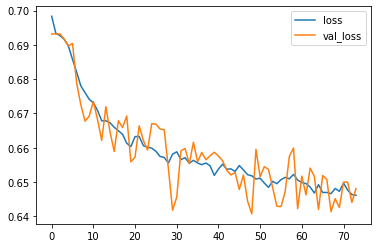

In [ ]:
#Analysing the model loss behavior
pd.DataFrame(model.history.history).plot()

In [ ]:
#Appying the test dataset on the model and creating a dataframe to analise the results
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(14895,))
pred_df = pd.DataFrame(y_test)#, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test_true_Y',"Model_predictions"]

In [ ]:
#Need to interpret these metrics on classfication model
print('Relação MAE média: ',
      mean_absolute_error(pred_df['Test_true_Y'], pred_df['Model_predictions']),
      '\nMSE: ',mean_squared_error(pred_df['Test_true_Y'], pred_df['Model_predictions']),
      '\nRMSE: ',mean_squared_error(pred_df['Test_true_Y'], pred_df['Model_predictions'])**0.5              
  )

Relação MAE média:  0.4691399072592352 
MSE:  0.2273041195085057 
RMSE:  0.4767642179405935


In [ ]:
print(classification_report(np.round(test_predictions),y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.64      0.70      9147
         1.0       0.55      0.71      0.62      5748

    accuracy                           0.67     14895
   macro avg       0.67      0.68      0.66     14895
weighted avg       0.69      0.67      0.67     14895



In [ ]:
print(confusion_matrix(np.round(test_predictions),y_test))

[[5826 3321]
 [1639 4109]]


In [ ]:
pred_df.Model_predictions = pred_df.Model_predictions.apply(lambda x: np.round(x))

In [ ]:
pred_df.sample(10)

,Test_true_Y,Model_predictions
6510,0,0.0
10786,1,0.0
3401,1,1.0
9912,1,1.0
2723,0,1.0
4950,1,1.0
9093,0,1.0
11524,1,0.0
6863,0,0.0
14809,0,1.0


In [ ]:
#New instances classification
#This model can be applied on any application via API (users can check their application on mobile apps or web applications)
#new = df with 80 feature engineered data of new applicants  
#new = scaler.transform(new)
#print(model.predict(new))